In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

### the LIF Model

A membrane equation with a reset condition.

\begin{align*}
\tau_m\,\frac{d}{dt}\,V(t) &= E_L - V(t) + R\,I(t) &\text{if }\quad V(t) \leq V_{th} \\ \\
V(t) &= V_{reset} &\text{otherwise}
\end{align*}


#### Ex1 Parameters

In [3]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


### Discrete Time Integration

#### Ex2 + Ex3 Pretty Print

In [4]:
# Loop for 10 steps, variable 'step' takes values from 0 to 9
for step in range(10):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin(2 * np.pi * 100 * t))

  # Print value of i
  print(f'{t:.3f} {i:.4e}')

0.000 2.5000e-10
0.001 3.9695e-10
0.002 4.8776e-10
0.003 4.8776e-10
0.004 3.9695e-10
0.005 2.5000e-10
0.006 1.0305e-10
0.007 1.2236e-11
0.008 1.2236e-11
0.009 1.0305e-10


#### Ex4 Membrane Potential

In [5]:
#################################################
## out compute v code ##
#################################################

# Initialize step_end and v0
step_end = 10
v = el

# Loop for step_end steps
for step in range(step_end):
  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + (dt / tau) * (el - v + r * i)

  # Print value of t and v
  print(f"{t:.3f} {v:.4e}")

0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


### Plotting

#### Ex5 Current

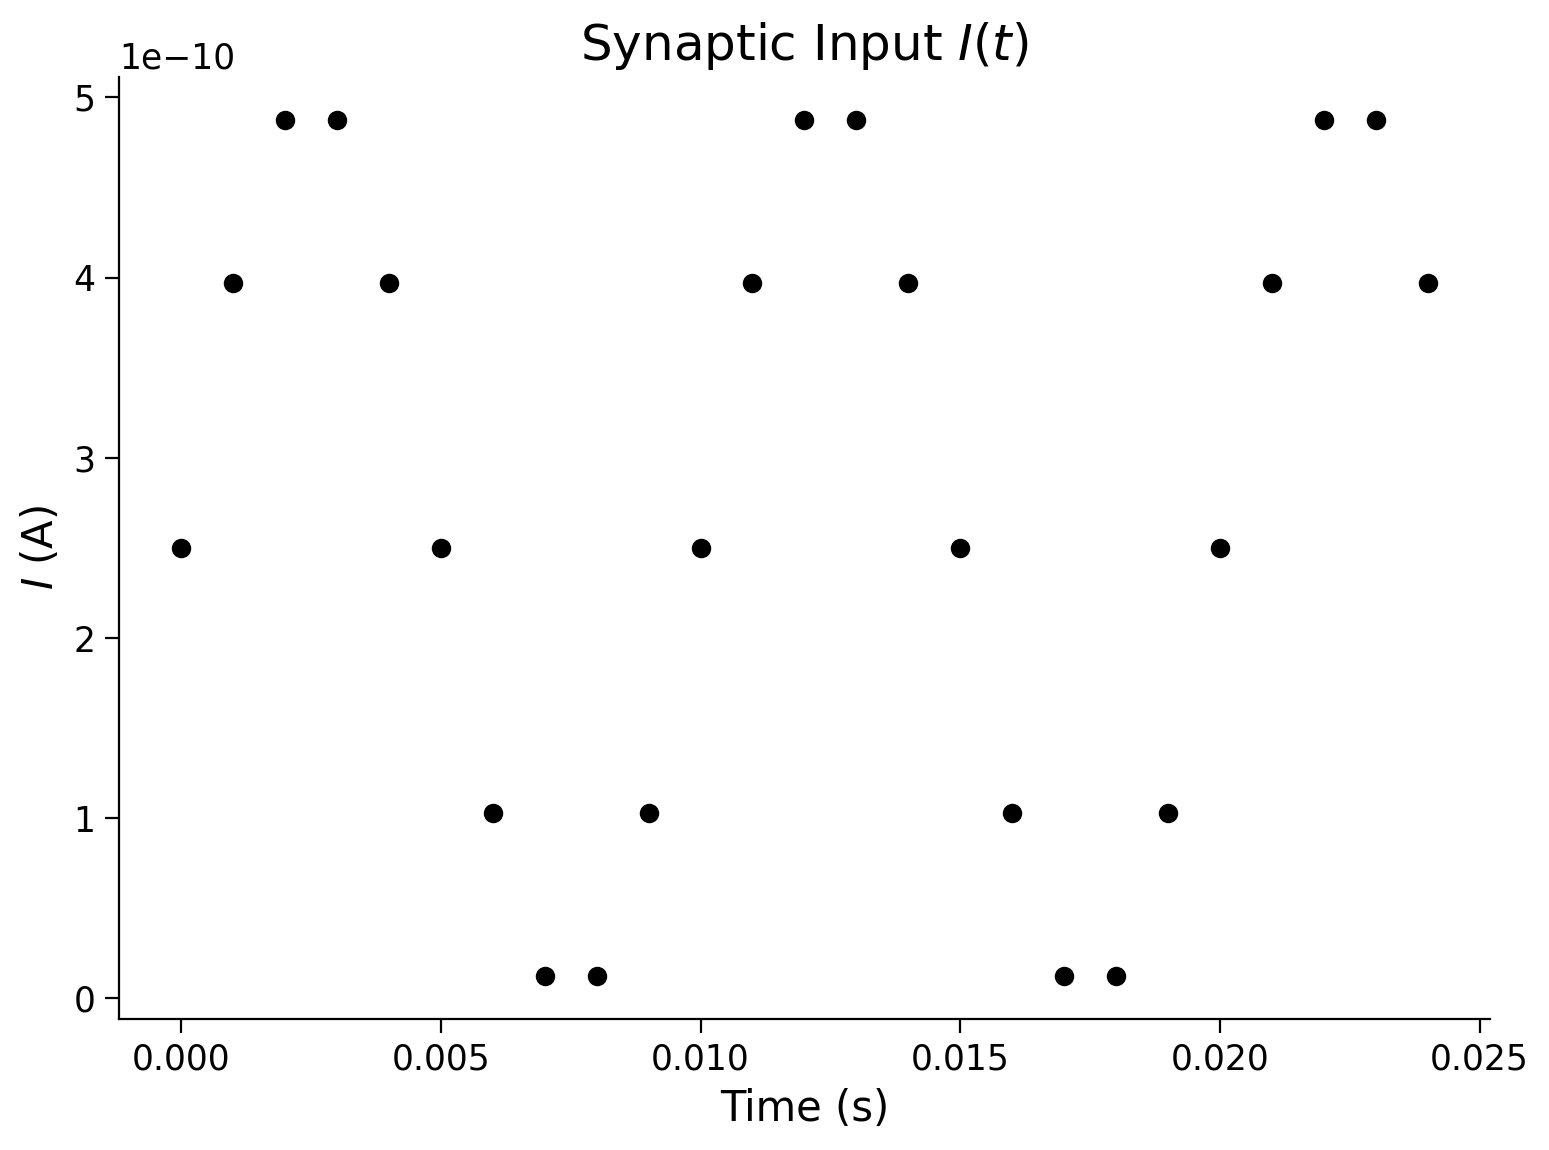

In [6]:
#################################################
# fill out the figure initialization and plotting code below ##
#################################################

# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title("Synaptic Input $I(t)$")
plt.xlabel("Time (s)")
plt.ylabel("$I$ (A)")

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
  plt.plot(t, i, 'ko')

# Display the plot
plt.show()

#### Ex6 Membrane Potential

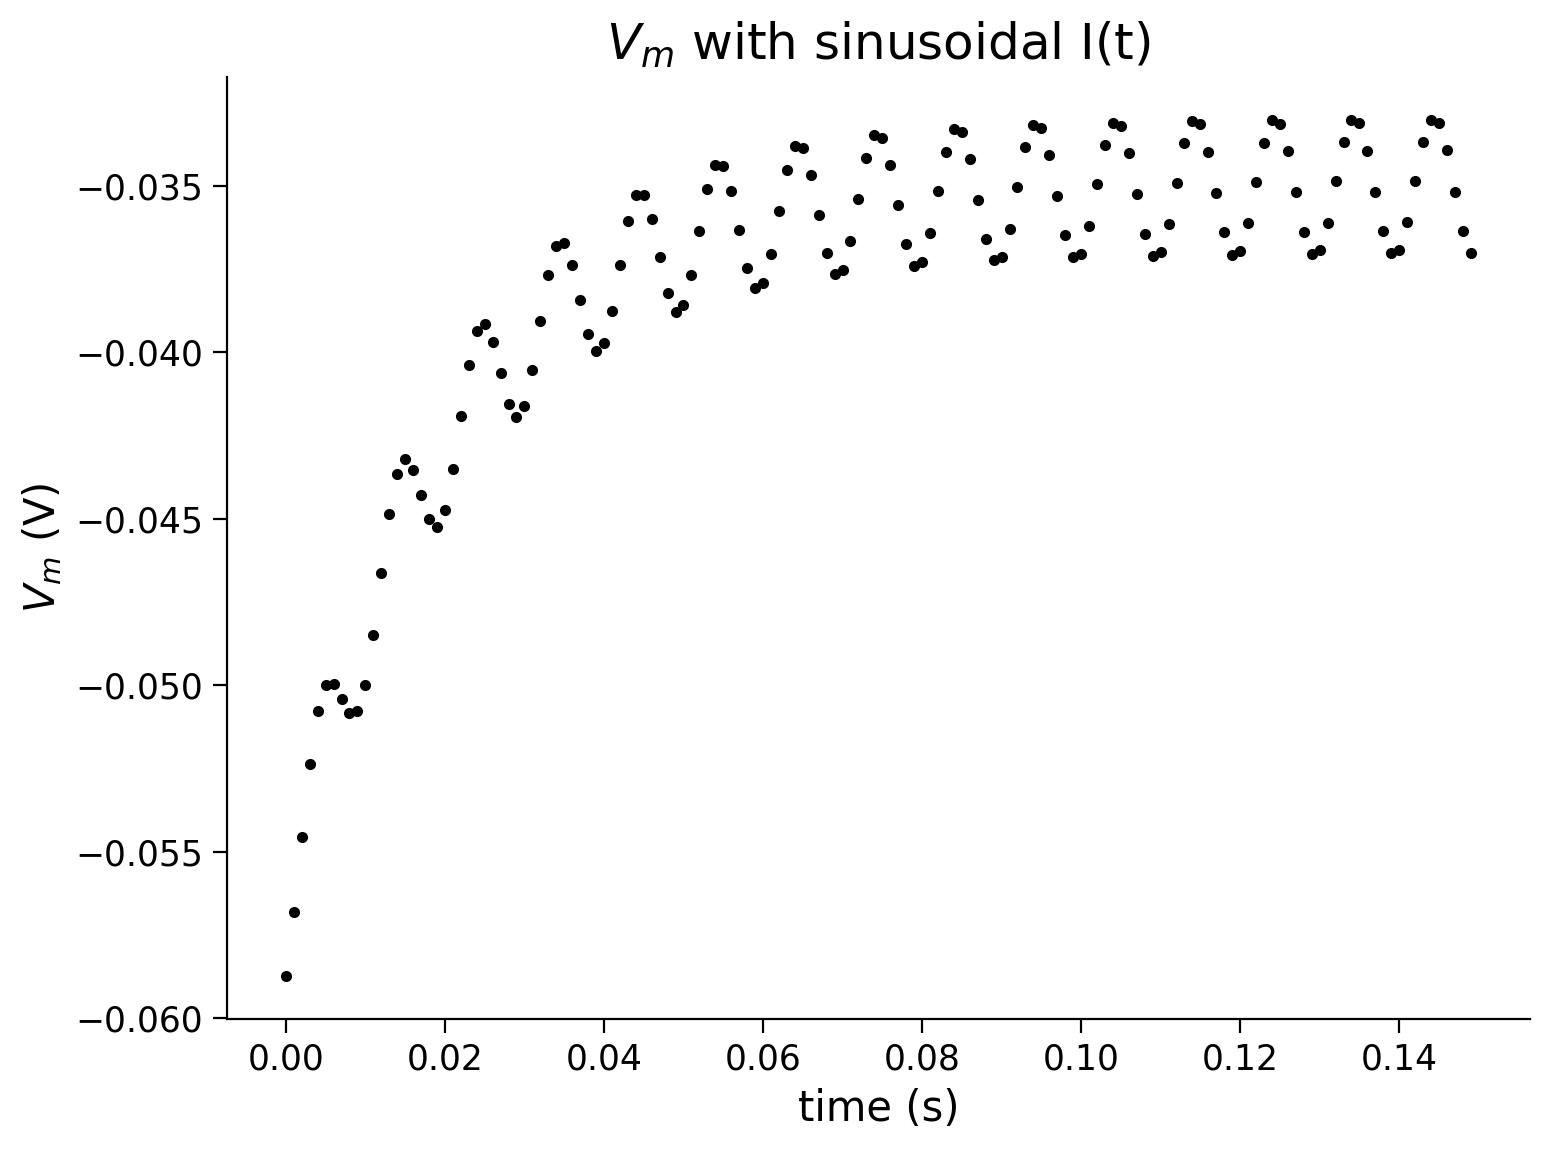

In [7]:
#################################################
## fill out the figure initialization and plotting code below ##
#################################################

# Initialize step_end
step_end = int(t_max / dt)

# Initialize v0
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')

# Display plot
plt.show()

### Random Synaptic Input

\begin{equation*}
I(t) = I_{mean}\left(1 + 0.1\,\sqrt{\frac{t_{max}}{\Delta t}}\,\xi(t)\right)\qquad\text{with }\xi(t)\sim \mathcal{U}(-1, 1)
\end{equation*}

#### Ex7 Randomness

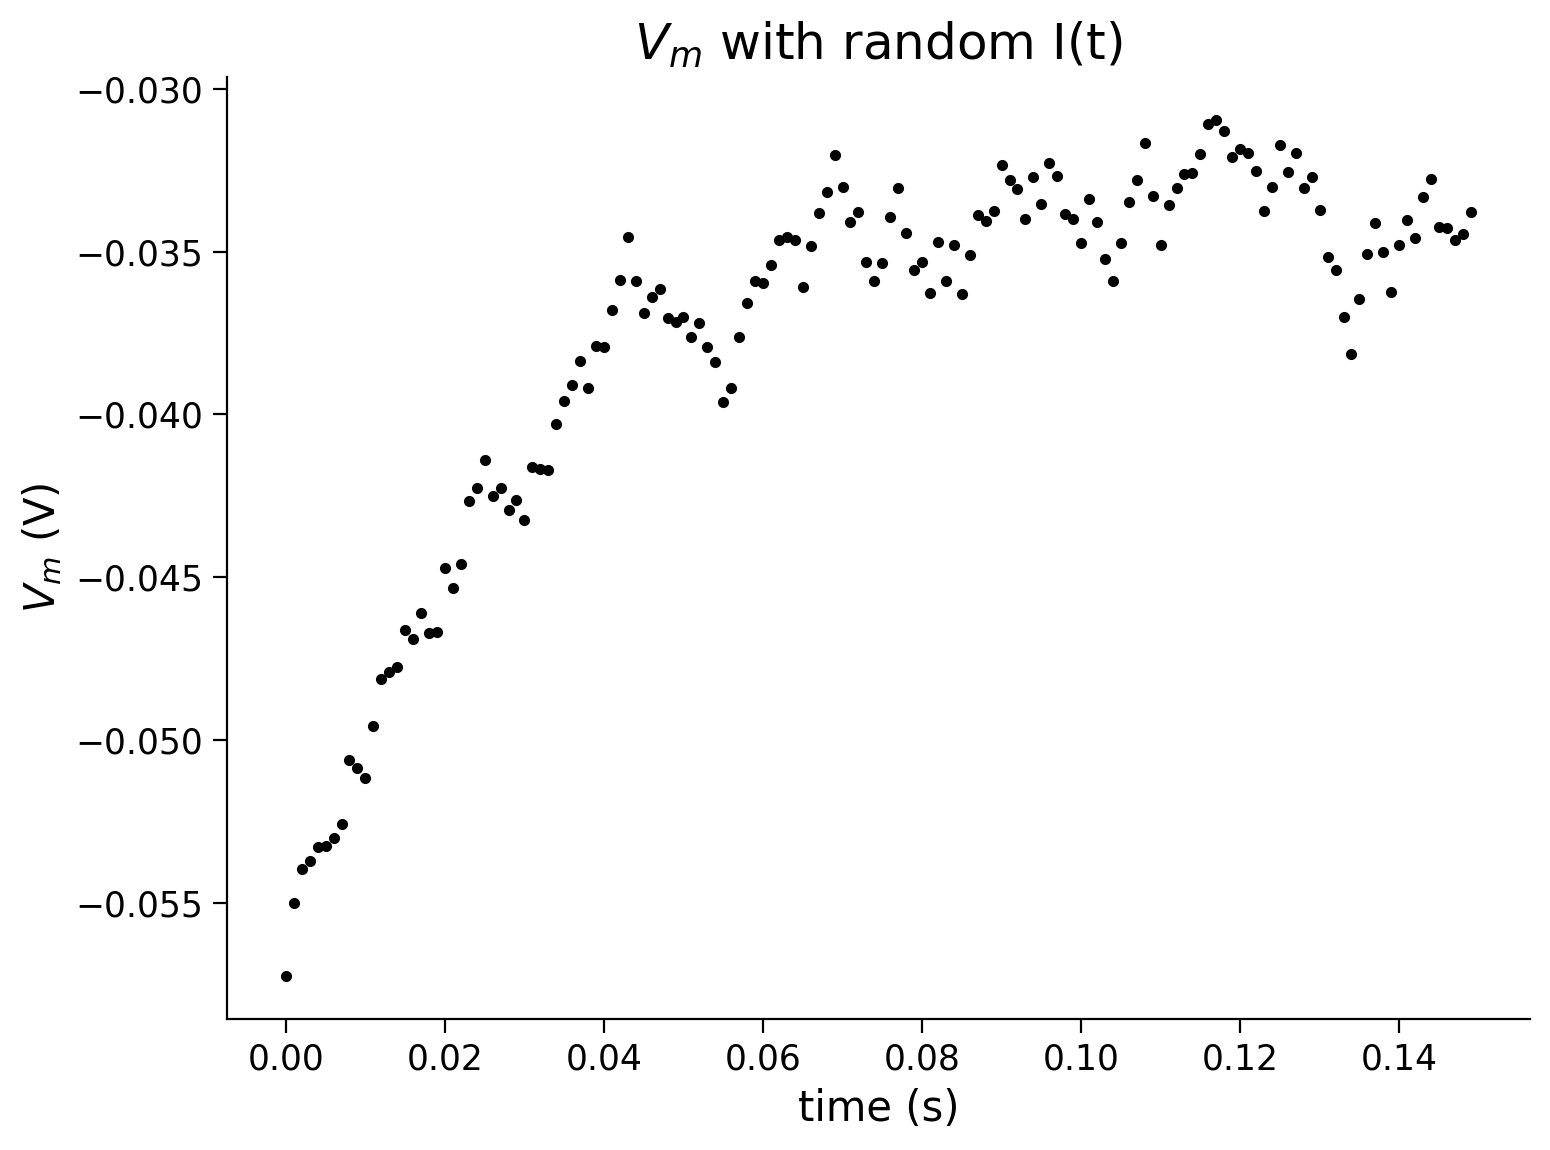

In [8]:
#################################################
## fill out code to get random input ##
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end and v
step_end = int(t_max / dt)
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Get random number in correct range of -1 to 1 (will need to adjust output of np.random.random)
  random_num = np.random.random() * 2 - 1

  # Compute value of i at this time step
  i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * random_num)

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')


# Display plot
plt.show()

### Ensemble Stat

\begin{align*}
\\
\left\langle V(t)\right\rangle &= \frac{1}{N}\sum_{n=1}^N V_n(t) & & \text{sample mean} \\
\left\langle (V(t) - \langle V(t)\rangle)^2\right\rangle &= \frac{1}{N-1}\sum_{n=1}^N (V_n(t) - \langle V(t)\rangle)^2 & & \text{sample variance} \\
\left\langle(V(t) - \langle V(t)\rangle) (V(s) - \langle V(s)\rangle)\right\rangle &= \frac{1}{N-1}\sum_{n=1}^N (V_n(t) - \langle V(t)\rangle) (V_n(s) - \langle V(s)\rangle) & & \text{sample autocovariance}
\end{align*}

#### Ex8 Simulation + Ex9 Sample Mean + Ex10 Sample Std Dev

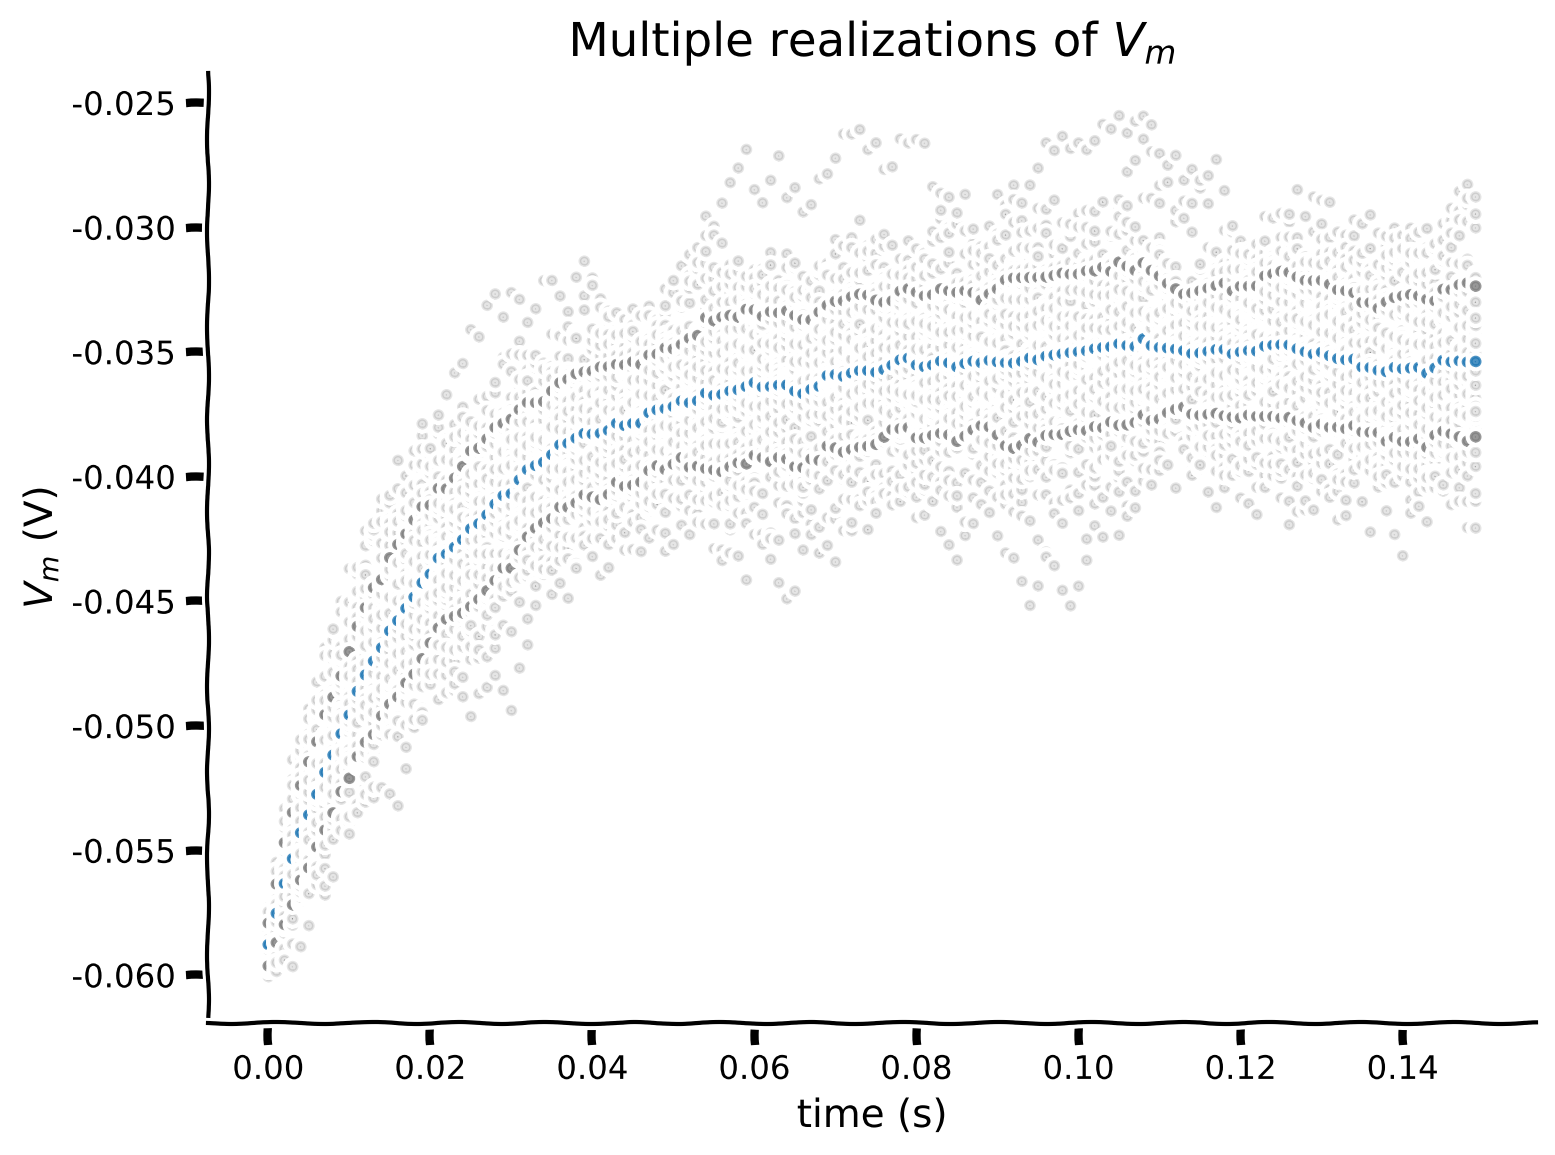

In [9]:
#################################################
## fill out code to store v in list ##
## fill out code to plot sample mean ##
## fill out code to plot sample standard deviation ##
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

with plt.xkcd():
  # Initialize the figure
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  # Loop for step_end steps
  for step in range(step_end):

    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0, n):

      # Compute value of i at this time step
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

      # Compute value of v for this simulation
      v_n[j] = v_n[j] + dt/tau * (el - v_n[j] + r*i)

    # Compute sample mean by summing list of v_n using sum, and dividing by n
    v_mean = sum(v_n) / n

    # Initialize a list `v_var_n` with the contribution of each V_n(t) to
    # Var(t) with a list comprehension over values of v_n
    v_var_n = [(v_n[i] - v_mean)**2 for i in range(n)]

    # Compute sample variance
    v_var = sum(v_var_n) / (n - 1)

    # Compute std dev
    v_std = np.sqrt(v_var)


    # Plot all simulations (use alpha = 0.1 to make each marker slightly transparent)
    plt.plot([t] * n, v_n, 'k.', alpha=0.1)

    # Plot sample mean using alpha=0.8 and'C0.' for blue
    plt.plot(t, v_mean, 'C0.', alpha=0.8)

    # Plot mean +- std dev with alpha 0.8 and argument 'C7.'
    plt.plot(t, v_mean + v_std, 'C7.', alpha=0.8)
    plt.plot(t, v_mean - v_std, 'C7.', alpha=0.8)

  # Display plot
  plt.show()

### Numpy

#### Ex11 Numpy Rewrite

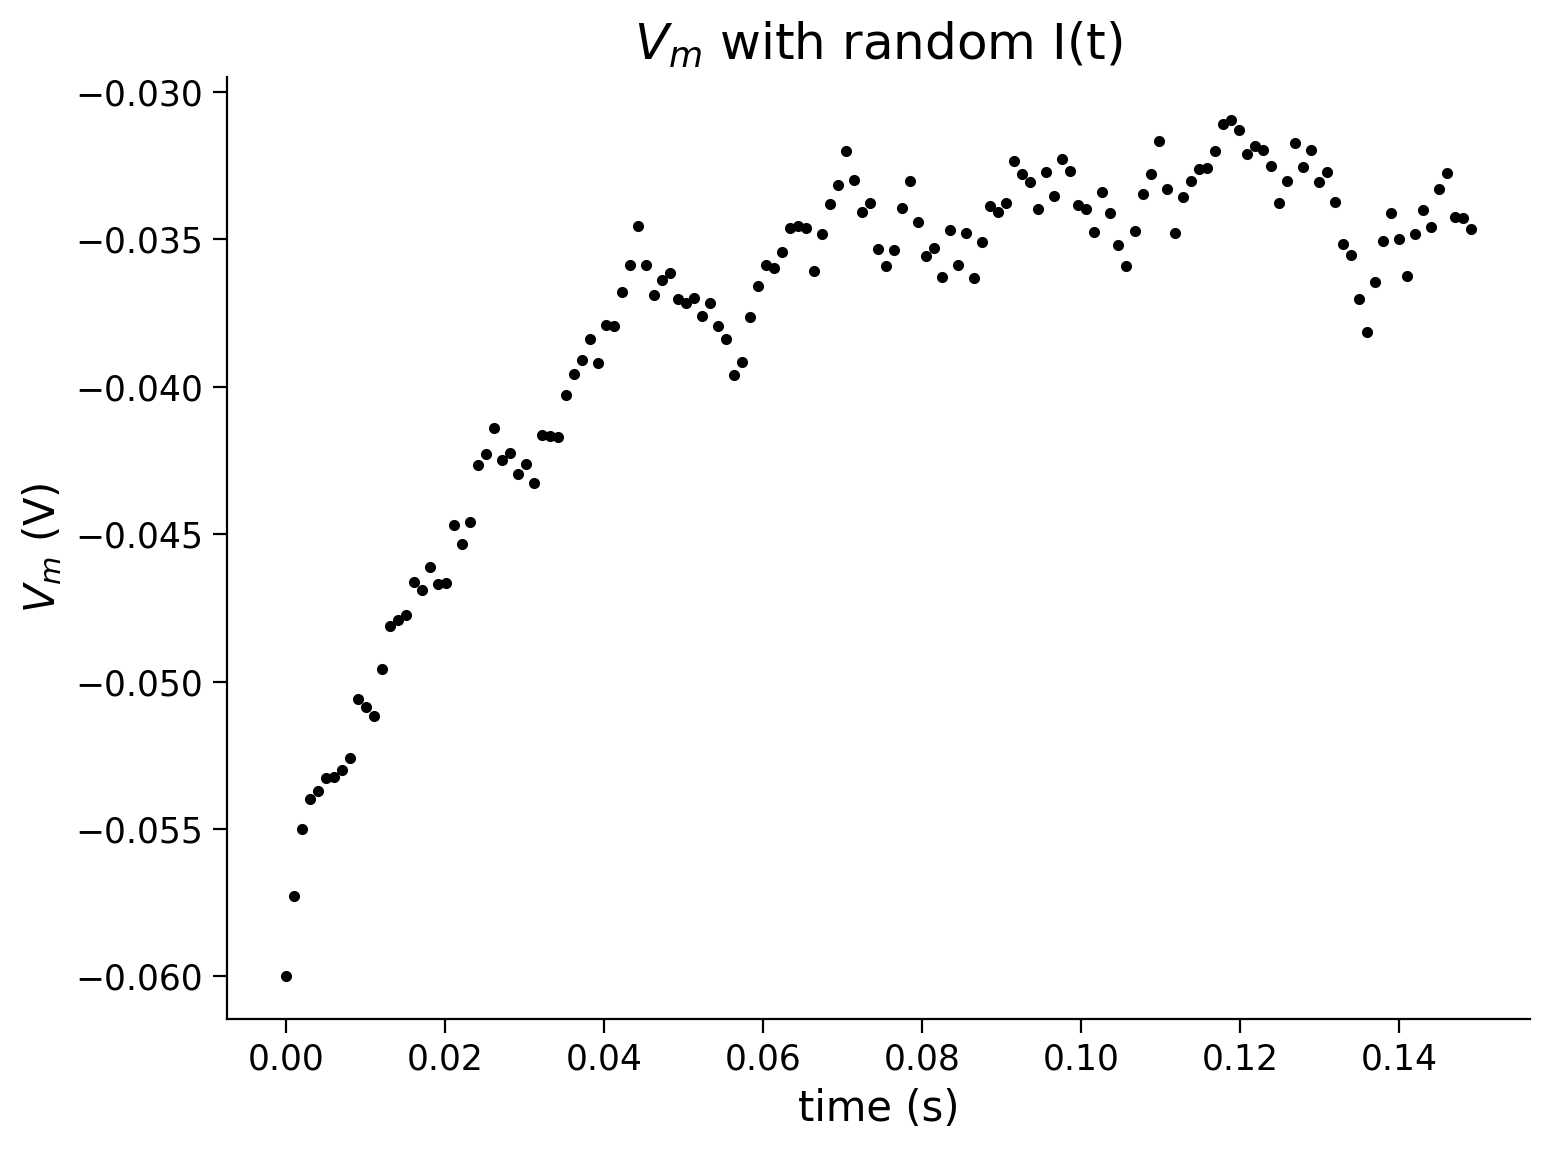

In [10]:
#################################################
## fill out code to rewrite simulation in numpy##
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * (2 * np.random.random(step_end) - 1))

# Loop for step_end steps
for step in range(1, step_end):

  # Compute v as function of i
  v[step] = v[step - 1] + dt / tau * (el - v[step - 1] + r * i[step - 1])


# Plot membrane potential
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k.')
plt.show()

#### Ex12 Enumerate

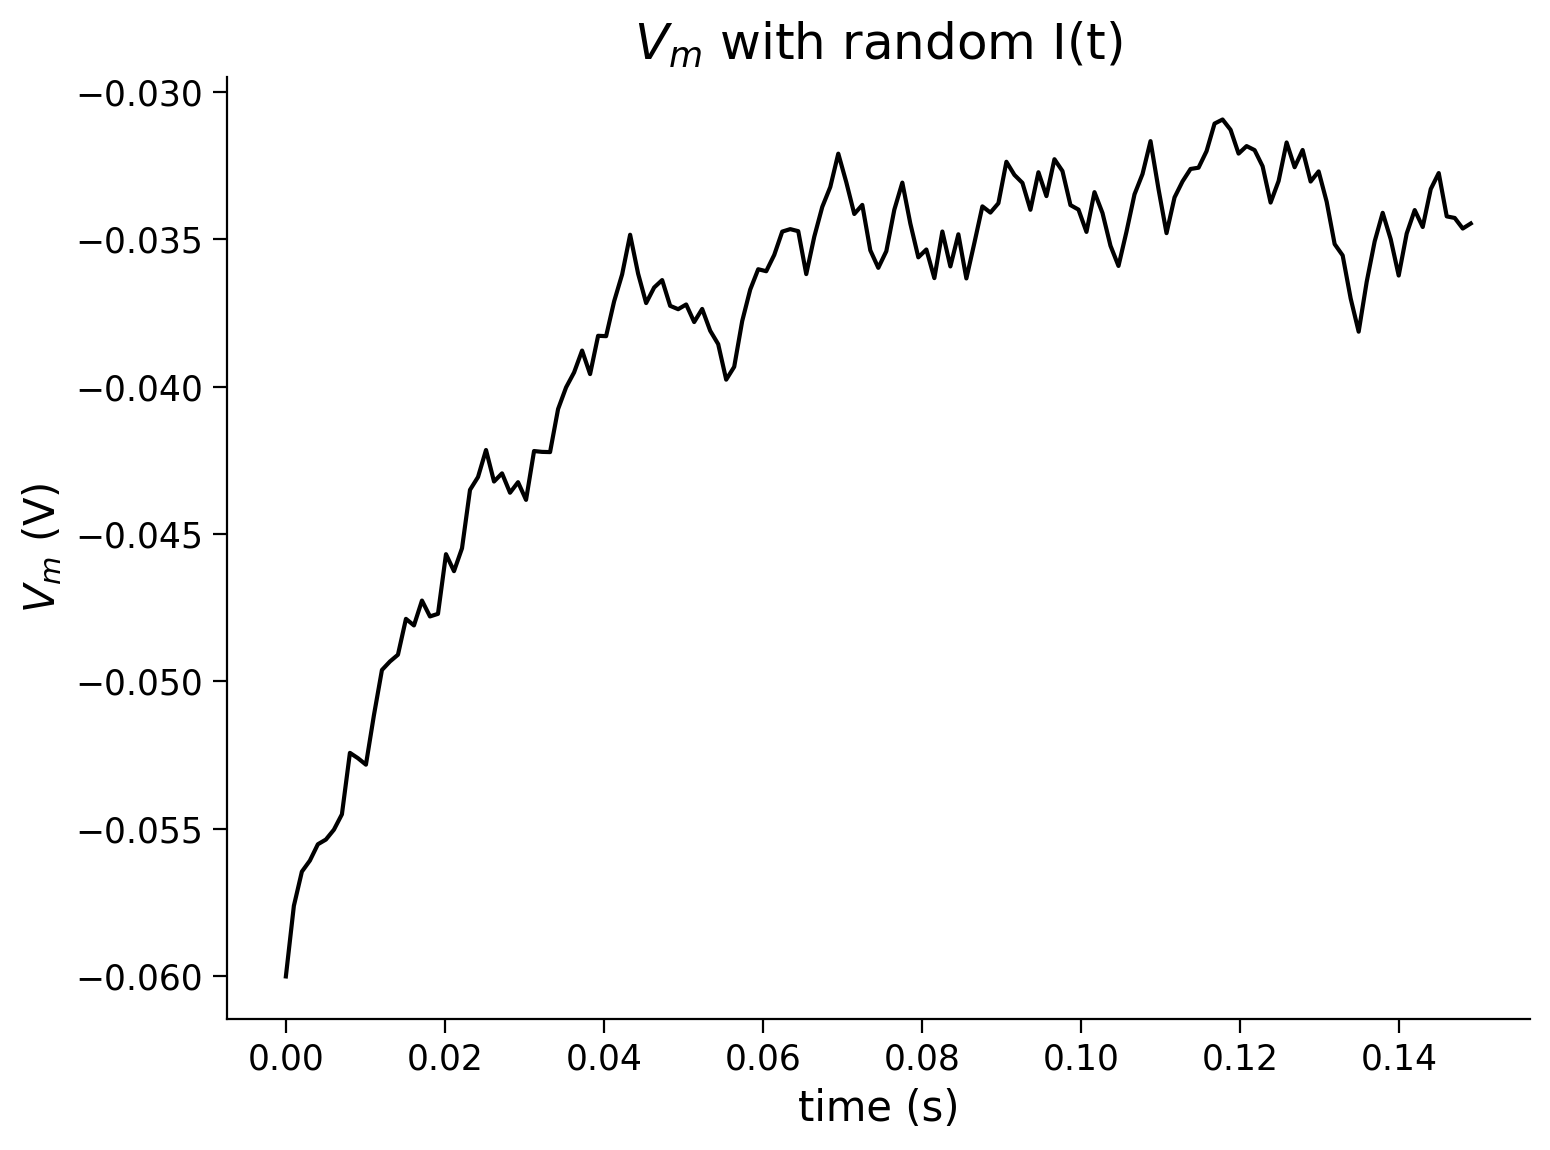

In [11]:
#################################################
## fill out code to rewrite simulation in numpy##
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1))

# Loop for step_end values of i using enumerate
for step, i_step in enumerate(i):

  # Skip first iteration
  if step==0:
    continue

  # Compute v as function of i using i_step
  v[step] = v[step - 1] + dt / tau * (el - v[step - 1] + r * i_step)

# Plot figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()

#### Ex13 2D Arrays + Ex14 Mean & Std. Dev.

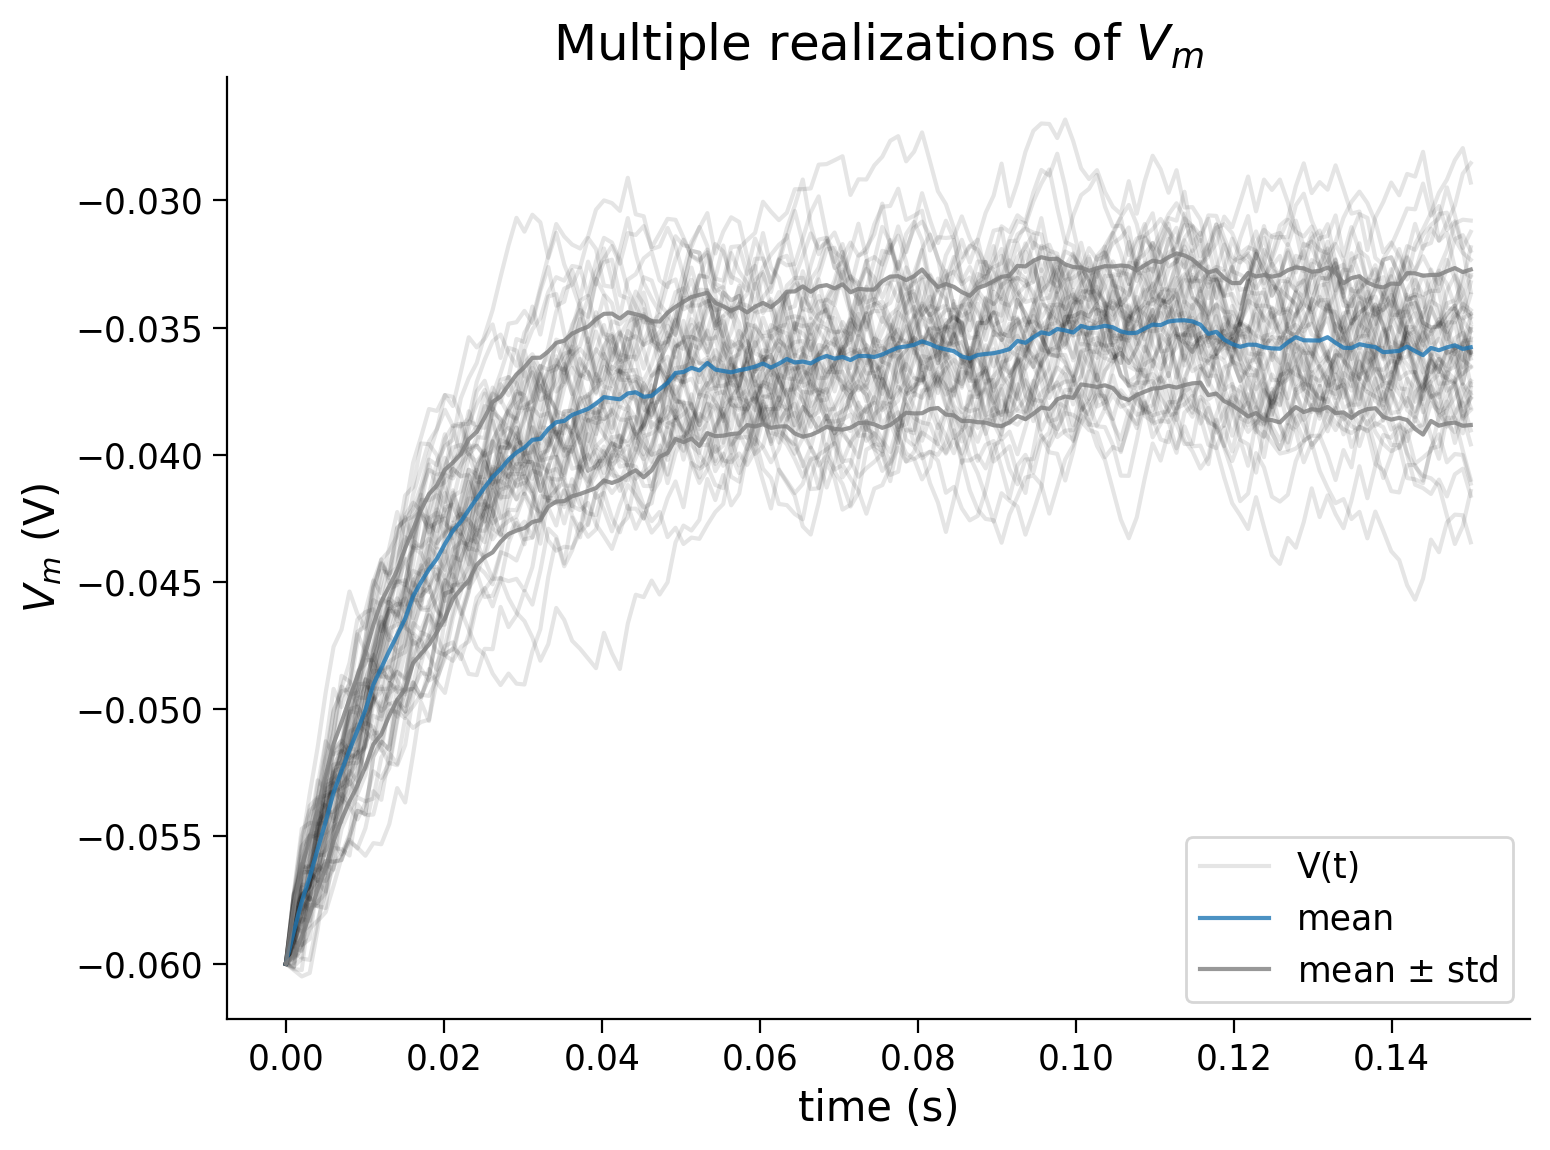

In [12]:
#################################################
## fill out code to use 2d arrays ##
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, n, t_range, v and i
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * (2 * np.random.random([n, step_end]) - 1))

# Loop for step_end - 1 steps
for step in range(1, step_end):

   # Compute v_n
   v_n[:, step] = v_n[:, step - 1] + dt / tau * (el - v_n[:, step - 1] + r * i[:, step - 1])


# Compute sample mean (use np.mean)
v_mean = np.mean(v_n, axis=0)

# Compute sample standard deviation (use np.std)
v_std = np.std(v_n, axis=0)

# Plot figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha=0.1)

plt.plot(t_range, v_n[-1], 'k', alpha=0.1, label='V(t)')
plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
plt.plot(t_range, v_mean+v_std, 'C7', alpha=0.8)
plt.plot(t_range, v_mean-v_std, 'C7', alpha=0.8, label='mean $\\pm$ std')

plt.legend()
plt.show()